In [1]:
import pygsp
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import scipy
import pyshtools
from deepsphere.utils import healpix_graph
import sys
from pygsp.graphs import NNGraph
import pickle

In [2]:
opt_std =  {1:1.097324009878543,
            2:1.097324042581347,
            4: 0.5710655156439823,
            8: 0.28754191240507265,
            16: 0.14552024595543614,
            32: 0.07439700765663292,
            64: 0.03654101726025044,
            128: 0.018262391329213392,
            256: 0.009136370875837834,
            512: 0.004570016186845779,
            1024: 0.0022857004460788742,}



In [3]:
from pygsp.graphs import SphereHealpix

the correct SphereHealpix is being used
0.10000000000000006


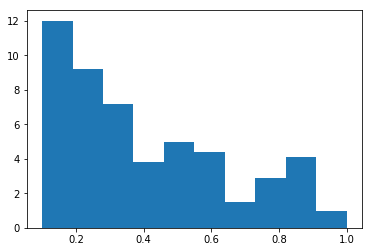

the correct SphereHealpix is being used
0.10000000000000006


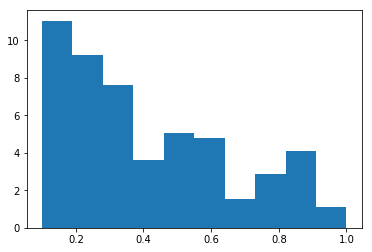

the correct SphereHealpix is being used
0.10000000000000006


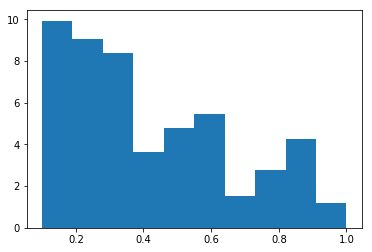

the correct SphereHealpix is being used
0.10000000000000006


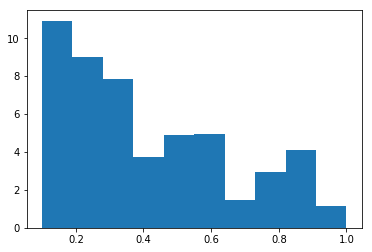

the correct SphereHealpix is being used
0.10000000000000006


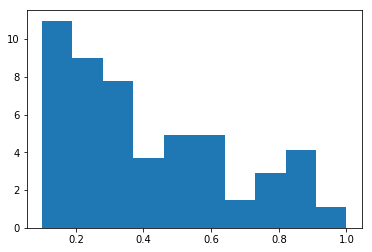

the correct SphereHealpix is being used
0.10000000000000006


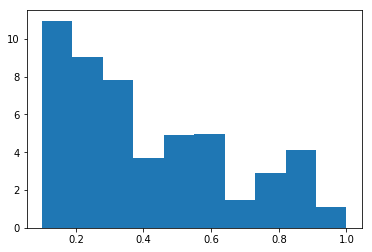

In [5]:
def kernel(distances, t):
        cst = np.log(0.5)
        weights = np.exp(cst*(distances/t)**2).flatten()
        return weights, np.min(weights)


for nside in 2**np.arange(3,9):
    sphere = SphereHealpix(nside=nside, n_neighbors=50, kernel_width=opt_std[nside])
    weights, m = kernel(sphere.distances, opt_std[nside])
    print(m)
    npix = 12*nside**2
    nbins=10
    plt.hist(weights, bins=nbins, weights=np.ones(len(weights))/npix);
    plt.show()

In [1]:


degree_step = {
            32: 10,
            64: 10,
            128: 50,
            256: 50,
            512: 100,
            1024: 200,    
}

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = None

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout = self._original_stdout
   

NameError: name 'NNGraph' is not defined

In [14]:
plt.rcParams['figure.figsize'] = (17, 5)  
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [5]:
def rotate_NEST(hmap, rot):
    return hp.reorder(rot.rotate_map_alms(hp.reorder(hmap, n2r=True)), r2n=True)


def _equivariance_error(hmap, max_iter, _filter, lmax, nside):
    """Calculates the equivariance error on one signal only
    as average of max_iter random rotations
    
    hmap is in NEST ordering"""

    
    angles = np.random.uniform(low=0, high=360, size=(max_iter, 3))
    norm = np.zeros(max_iter)
    
    for i, [alpha, beta, gamma] in enumerate(angles):
      
        rot = hp.rotator.Rotator(rot=[alpha, beta, gamma])
        R_hmap = rotate_NEST(hmap, rot)
        FR_hmap = _filter(R_hmap)
        # ------ first filter, then rotate ------
        F_hmap = _filter(hmap)
        RF_hmap = rotate_NEST(F_hmap, rot)
        norm[i] = np.linalg.norm(RF_hmap-FR_hmap)
            
    filtered_norm = np.linalg.norm(F_hmap)      
    return np.mean(norm)/filtered_norm


def equivariance_error(max_iter, _filter, lmax, nside, degree=None):
    """Calculates the equivariance error on max_iter signals
    with the same power spectrum as average of N random rotations each"""
   
    N = 5
    np.random.seed(seed=1994)
    degrees = np.arange(lmax+1, dtype=float)

    degrees[0] = np.inf

    power = degrees**(-3) 
    if degree is not None:
        assert degree < lmax+1
        power = np.zeros(lmax+1)
        power[degree] = 1
    norm = np.zeros(max_iter)
    for i in range(max_iter):
        hmap = hp.sphtfunc.synfast(power, nside=nside)  ## this is RING ORDERED
        hmap = hp.reorder(hmap, r2n=True)
        norm[i] = _equivariance_error(hmap, N, _filter, lmax, nside)
    return np.mean(norm)


In [6]:
nsides = [32, 64]#, 128, 256, 512]# 1024]

# 4) Grid search on kernel width

### Everything works fine!
However, we were using the original DeepSphere graph. we want to do the same with more neighbors and __then__ sparsify the graph. Let's now use the SphereHealpix class of Frederick

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


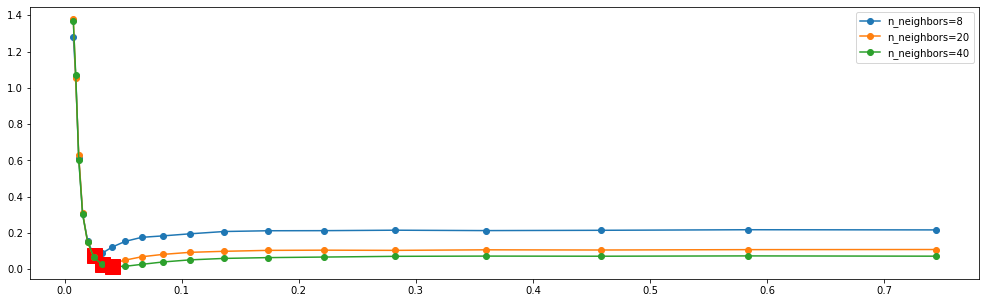

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


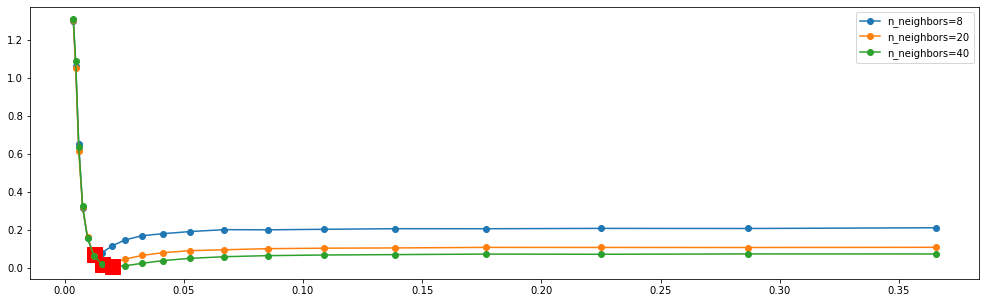

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


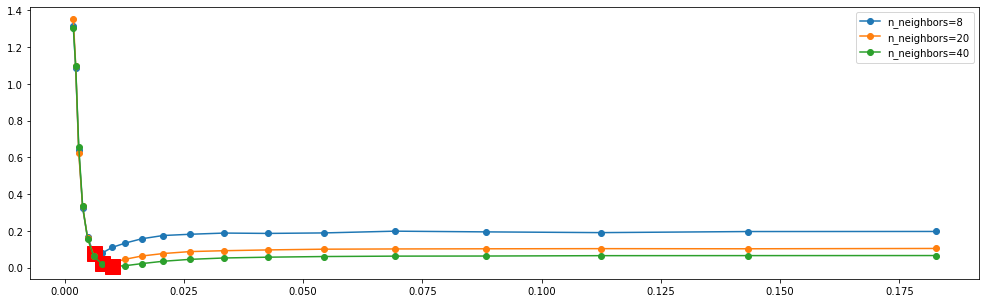

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


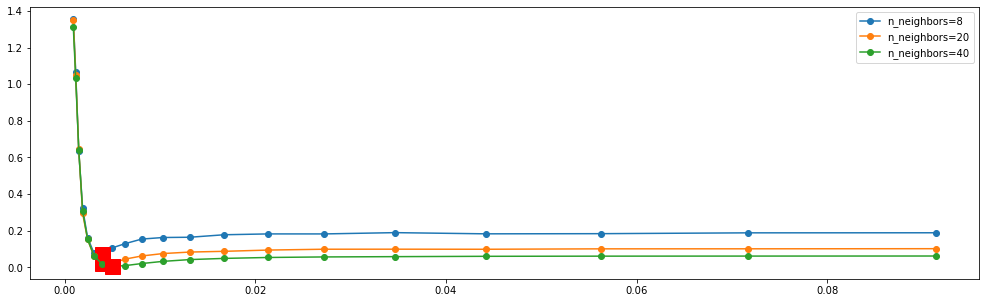

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


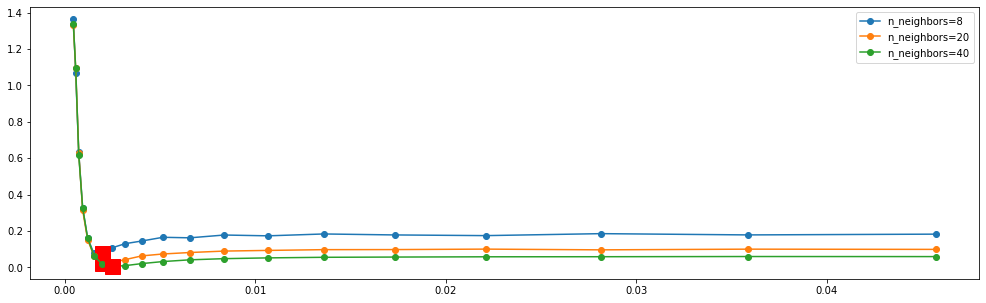

In [9]:
equiv_error = dict()

for nside in nsides:
    equiv_error[nside] = dict()
    
    # generating hmaps (red noise)
    lmax = 3*nside-1
    degrees = np.arange(lmax+1, dtype=float)
    degrees[0] = np.inf
    power = degrees**(-3)  # red noise
    hmap = hp.sphtfunc.synfast(power, nside=nside)
    hmap = hp.pixelfunc.reorder(hmap, r2n=True)

    # std deviations to try
    min_std = opt_std[nside]/10
    max_std = opt_std[nside]*10
    kernels = np.logspace(np.log10(min_std), np.log10(max_std), 20)

    for n_neighbors in [8, 20, 40]:
        
        equiv_error[nside][n_neighbors] = np.empty(len(kernels))
        for i, kernel_width in enumerate(kernels):

            sphere = SphereHealpix(Nside=nside, nest=True, n_neighbors=n_neighbors, lap_type='combinatorial', kernel_width=kernel_width)
            # WARNING: healpix graph is in NEST ordering
            HKGL_filter = sphere.L

            def diffuse_HKGL(x):
                """x is in NEST order, must return result in NEST order"""
                return HKGL_filter@x

            with HiddenPrints():
                equiv_error[nside][n_neighbors][i] = _equivariance_error(hmap, 5, diffuse_HKGL, lmax, nside);

            del(sphere)

        plt.plot(kernels, equiv_error[nside][n_neighbors], 'o-', label="n_neighbors={}".format(n_neighbors))
        j = np.argmin(equiv_error[nside][n_neighbors])
        plt.plot(kernels[j], equiv_error[nside][n_neighbors][j], 'rs', markersize=15)
        plt.legend()
    plt.show()
        
filename = "new_normalisation_grid_search.pickle"
filehandler = open(filename, 'wb') 
pickle.dump(equiv_error, filehandler)

In [10]:
opt_std =  {1:1.097324009878543,
            2:1.097324042581347,
            4: 0.5710655156439823,
            8: 0.28754191240507265,
            16: 0.14552024595543614,
            32: 0.07439700765663292,
            64: 0.03654101726025044,
            128: 0.018262391329213392,
            256: 0.009136370875837834,
            512: 0.004570016186845779,
            1024: 0.0022857004460788742,}

opt = dict()
for n_neighbors in [8, 20, 40]:
    opt[n_neighbors] = dict()
    for nside in nsides:
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 20)
        opt[n_neighbors][nside] = kernels[np.argmin(equiv_error[nside][n_neighbors])]

In [11]:
opt

{8: {32: 0.024996042676954985,
  64: 0.012277117799040067,
  128: 0.006135831633916154,
  256: 0.003911584063744079,
  512: 0.0019565758363414877},
 20: {32: 0.03185183192481174,
  64: 0.015644424107847475,
  128: 0.007818736767585342,
  256: 0.003911584063744079,
  512: 0.0019565758363414877},
 40: {32: 0.040587992670608114,
  64: 0.019935298306361107,
  128: 0.009963220682731385,
  256: 0.004984433726904096,
  512: 0.002493215645881148}}

# 5) Re-define V2 with these minima

In [12]:
degree_step = {
            32: 10,
            64: 10,
            128: 50,
            256: 50,
            512: 100,
            1024: 200,    
}

def _import_hp():
    try:
        import healpy as hp
    except Exception as e:
        raise ImportError('Cannot import healpy. Choose another graph '
                          'or try to install it with '
                          'conda install healpy. '
                          'Original exception: {}'.format(e))
    return hp

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = None

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout = self._original_stdout
        
        
class SphereHealpix(NNGraph):
    r"""Spherical-shaped graph using HEALPix sampling scheme (NN-graph).

    Parameters
    ----------
    Nside : int
        Resolution of the sampling scheme. It should be a power of 2 (default = 1024)
    nest : bool
        ordering of the pixels (default = True)

    See Also
    --------
    SphereEquiangular, SphereIcosahedron

    Notes
    -----
    This graph us based on the HEALPix[1]_ sampling scheme mainly used by the cosmologist.
    Heat Kernel Distance is used to find its weight matrix.

    References
    ----------
    [1] K. M. Gorski et al., « HEALPix -- a Framework for High Resolution Discretization,
    and Fast Analysis of Data Distributed on the Sphere », ApJ, vol. 622, nᵒ 2, p. 759‑771, avr. 2005.

    Examples
    --------
    >>> import matplotlib.pyplot as plt
    >>> G = graphs.SphereHealpix(Nside=4)
    >>> fig = plt.figure()
    >>> ax1 = fig.add_subplot(121)
    >>> ax2 = fig.add_subplot(122, projection='3d')
    >>> _ = ax1.spy(G.W, markersize=1.5)
    >>> _ = _ = G.plot(ax=ax2)

    """

    def __init__(self, indexes=None, Nside=32, nest=True, kernel_width=None, n_neighbors=None, **kwargs):
        hp = _import_hp()
        self.Nside = Nside
        self.nest = nest
        npix = hp.nside2npix(Nside)
        if indexes is None:
            indexes = np.arange(npix)
        x, y, z = hp.pix2vec(Nside, indexes, nest=nest)
        self.lat, self.lon = hp.pix2ang(Nside, indexes, nest=nest, lonlat=False)
        coords = np.vstack([x, y, z]).transpose()
        coords = np.asarray(coords, dtype=np.float32)
        ## TODO: n_neighbors in function of Nside
        if n_neighbors is None:
            n_neighbors = 6 if Nside==1 else 8
            if Nside>=4:
                n_neighbors = 50
            elif Nside == 2:
                n_neighbors = 47
            else:
                n_neighbors = 11
        
        """self.opt_std =  {8: {32: 0.024996042676954985,
                              64: 0.012277117799040067,
                              128: 0.006135831633916154},
                         20: {32: 0.03185183192481174,
                              64: 0.015644424107847475,
                              128: 0.007818736767585342},
                         40: {32: 0.040587992670608114,
                              64: 0.019935298306361107,
                              128: 0.009963220682731385}}"""  # for normalised laplacian
        self.opt_std = opt
       

        if kernel_width is None:
            try:
                kernel_width = self.opt_std[n_neighbors][Nside]
            except:
                raise ValueError('Unknown sigma for nside>32')
        ## TODO: check std
        plotting = {
            'vertex_size': 80,
            "limits": np.array([-1, 1, -1, 1, -1, 1])
        }
        super(SphereHealpix, self).__init__(features=coords, k=n_neighbors,
                                     kernel_width=kernel_width, plotting=plotting, **kwargs)
        

In [13]:
def plot_equivariance_error_by_degree(graph='V1', nsides = [32, 64, 128], n_neighbors=None, save=False, title='Equivariance Error'):
    equiv_error = dict()
    for nside in nsides:
        lmax = 3*nside-1
        
        if graph=='V2':
            sphere = SphereHealpix(Nside=nside, nest=True, lap_type='combinatorial', n_neighbors=n_neighbors)
        else:
            sphere = healpix_graph(nside=nside, nest=True, lap_type='combinatorial')
        
        def diffuse_HKGL(hmap):
            """hmap must be in NEST ordering"""
            return sphere.L@hmap

        degrees = np.arange(0, lmax+1, degree_step[nside])
        equiv_error[nside] = np.zeros(len(degrees))
        for i, degree in enumerate(degrees):
            if not i:
                equiv_error[nside][i] = 0
            else:
                with HiddenPrints():
                    equiv_error[nside][i] = equivariance_error(5, diffuse_HKGL, lmax,nside, degree=degree)
        plt.plot(degrees, equiv_error[nside], 'o-', label='nside={}'.format(nside))

    plt.xlabel('Degree', fontdict=font)
    plt.ylabel('Equivariance Error', fontdict=font)
    plt.title(title, fontdict=font)

    plt.grid()
    plt.legend()
    plt.savefig(title+".pdf")
    plt.show()
    
    if save:
        filename = title+".pickle"
        filehandler = open(filename, 'wb') 
        pickle.dump(equiv_error, filehandler)

In [14]:
nsides = [32, 64, 128, 256, 512]

# V2, divided by ||f||, combinatorial

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


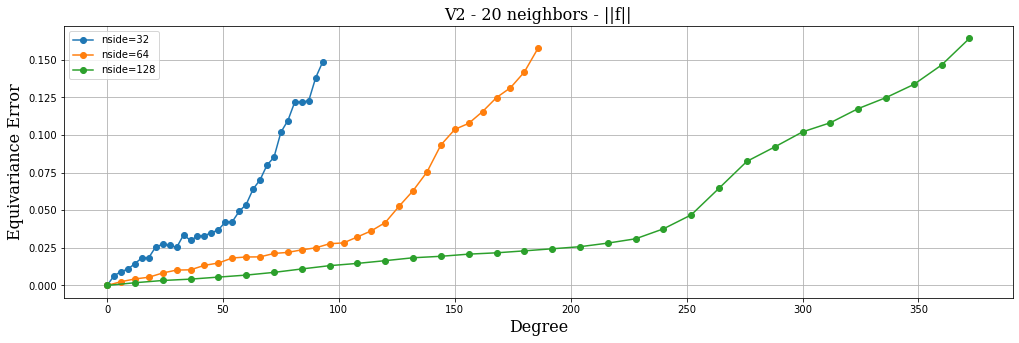

In [25]:
plot_equivariance_error_by_degree(graph='V2', n_neighbors=20, save=False, title='V2 - 20 neighbors - ||f||')

# V1

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new

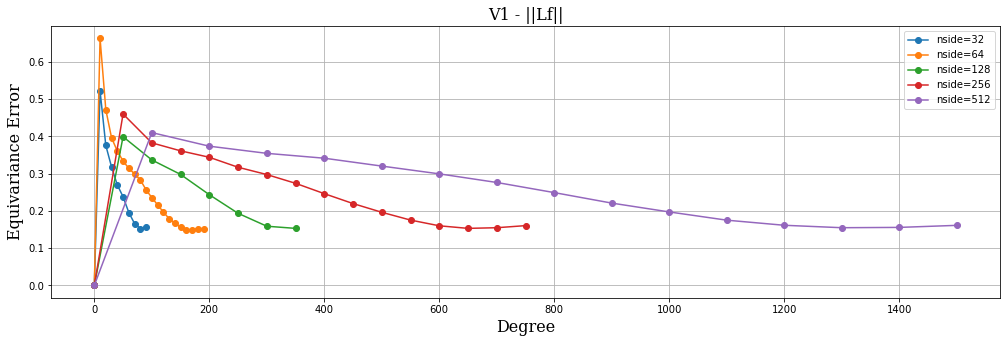

In [15]:
plot_equivariance_error_by_degree(graph='V1', title='V1 - ||Lf||', nsides=nsides, save=True)

# V2: 
### 40 neighbors

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


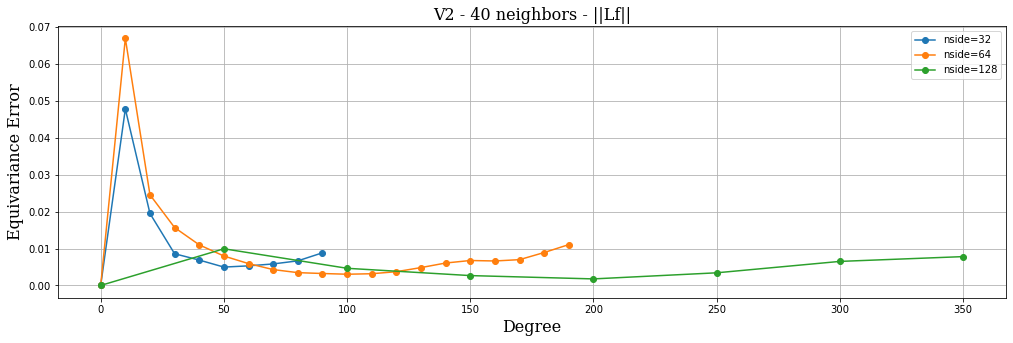

In [15]:
plot_equivariance_error_by_degree(graph='V2', n_neighbors=40, save=True, title='V2 - 40 neighbors - ||Lf||', nsides=nsides)

### 20 neighbors

In [22]:
error = pickle.load(open("V2 - 20 neighbors - ||Lf||.pickle", "rb"))

In [23]:
error

{32: array([0.        , 0.08257515, 0.03722197, 0.02018037, 0.01687871,
        0.0138402 , 0.01643947, 0.02118037, 0.02758348, 0.0329909 ]),
 64: array([0.        , 0.11237876, 0.04524796, 0.03109942, 0.02418351,
        0.01949056, 0.01628965, 0.01347837, 0.01206413, 0.01142726,
        0.01112969, 0.01160995, 0.01350333, 0.01768491, 0.02314146,
        0.02798166, 0.02969788, 0.03100878, 0.03533948, 0.03825851]),
 128: array([0.        , 0.02424668, 0.01631533, 0.01224461, 0.00996844,
        0.01417613, 0.02759621, 0.03382102])}

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


KeyboardInterrupt: 

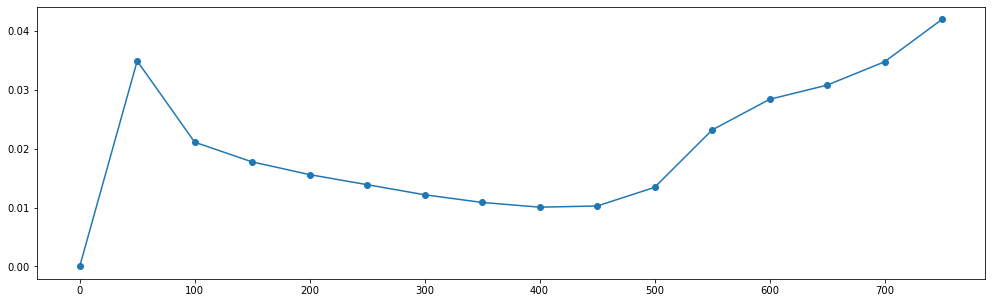

In [24]:
plot_equivariance_error_by_degree(graph='V2', n_neighbors=20, save=True, title='V2 - 20 neighbors - ||Lf|| - 256-512', nsides=[256, 512])

### 8 neighbors

/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/home/martino/miniconda3/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


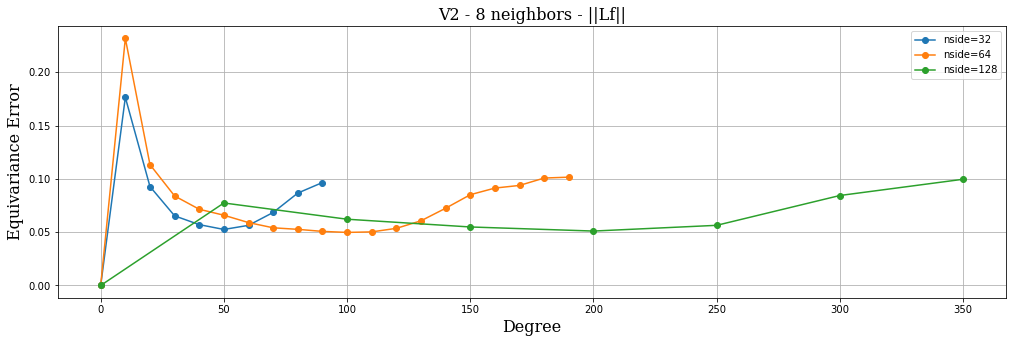

In [25]:
plot_equivariance_error_by_degree(graph='V2', n_neighbors=8, save=True, title='V2 - 8 neighbors - ||Lf||')

# 7) Equivariance error of Khasanova-Frossard

In [27]:
from pygsp.graphs import Graph
from scipy import sparse

class SphereEquiangularFrossard(Graph):
    def __init__(self, bw=64, sptype='DH', pole='all', neighbors=4, weights=None, dist=None, 
                 affine=0., **kwargs):
        """Sphere with an equiangular sampling
         Parameters
        ----------
        bw : int
            bandwidth, size of grid  (default = 64)
        sptype: str
            sampling type, possible arguments are 'DH', 'SOFT', ... (default = 'DH')
        pole: str
            how to manage the pole of the sphere, possible arguments are 'all', 'one', 'zero' (default = 'all')
        ---------
        TODO: unique on neighbor
        TODO: CC and GL are not equiangular and must be implement in other ways
        """
        self.bw = bw
        self.sptype = sptype
        self.pole = pole
        if pole not in ['all', 'one', 'zero']:
            raise ValueError('Unknown pole value:' + pole) 
        if sptype is not 'DH' and pole is not 'zero':
            print('pole can be only zero with sampling type ' + sptype)
            pole = 'zero'
        
        ## sampling and coordinates calculation
        if sptype is 'DH':
            beta = np.arange(2 * bw) * np.pi / (2. * bw)  # Driscoll-Heally
            alpha = np.arange(2 * bw) * np.pi / bw
            if pole is 'zero':
                beta = np.arange(2 * bw + 1) * np.pi / (2. * bw + 1)
        if pole is not 'all' and sptype is 'DH':
            beta = beta[1:]
        
        theta, phi = np.meshgrid(beta, alpha,indexing='ij')
        ct = np.cos(theta).flatten()
        st = np.sin(theta).flatten()
        cp = np.cos(phi).flatten()
        sp = np.sin(phi).flatten()
        x = st * cp
        y = st * sp
        z = ct
        coords = np.vstack([x, y, z]).T
        
        if pole is 'one':
            coords = np.vstack([[0., 0., 1.],coords])
        coords = np.asarray(coords, dtype=np.float32)
        
        ## neighbors and weight matrix calculation
        def south(x, bw):
            if x >= (2*bw)*(2*bw-1):
                return north((x+bw)%(2*bw)+(2*bw)*(2*bw),bw)
            elif self.pole is 'zero' and x >= (2*bw)*(2*bw-1):
                return north((x+bw)%(2*bw)+(2*bw)*(2*bw-1),bw)
            else:
                return x + 2*bw

        def north(x, bw):
            if x < 2*bw:
                return (x+bw)%(2*bw)
            else:
                return x - 2*bw

        def west(x, bw):
            if x%(2*bw)==0:
                x += 2*bw
            return x -1

        def east(x, bw):
            if x%(2*bw)==2*bw-1:
                x -= 2*bw
            return x + 1

        npix = len(coords)
        col_index=[]
        for ind in range(len(coords)):
            # first line is the same point, so is connected to all points of second line
            if pole is 'all' and sptype and ind < 2* bw:
                if ind == 0:
                    neighbor = np.arange(2*bw)+2*bw # np.arange(1,4*bw)
                else:
                    neighbor = np.arange(2*bw)+2*bw # [0]
            elif pole is 'all' and ind < 4*bw:
                if neighbors==8:
                    neighbor = [south(west(ind,bw),bw), west(ind,bw), east(ind,bw), south(east(ind,bw),bw), south(ind,bw)]
                elif neighbors==4:
                    neighbor = [west(ind,bw), east(ind,bw), south(ind,bw)]
                else:
                    neighbor = []
                neighbor += list(range(2*bw)) # [0]
            elif pole is 'one' and ind == 0:
                neighbor = np.arange(1, 2*bw+1)
            elif pole is 'one' and ind < 2*bw+1:
                ind += 2*bw - 1
                if neighbors==8:
                    neighbor = [south(west(ind,bw),bw), west(ind,bw), east(ind,bw), south(east(ind,bw),bw), south(ind,bw)]
                elif neighbors==4:
                    neighbor = [west(ind,bw), east(ind,bw), south(ind,bw)]
                else:
                    neighbor = []
                neighbor += [0]
            else:
                if pole is 'one':
                    ind += 2*bw - 1
                if neighbors==8:
                    neighbor = [south(west(ind,bw),bw), west(ind,bw), north(west(ind,bw), bw), north(ind,bw), 
                                north(east(ind,bw),bw), east(ind,bw), south(east(ind,bw),bw), south(ind,bw)]
                elif neighbors==4:
                    neighbor = [west(ind,bw), north(ind,bw), east(ind,bw), south(ind,bw)]
                else:
                    neighbor = []
            neighbor = np.asarray(neighbor)
            if pole is 'one' and ind != 0:
                neighbor -= 2*bw - 1
                neighbor[neighbor<0] = 0
            #neighbors.append(neighbor)
            col_index += list(neighbor)
        # neighbors = np.asarray(neighbors)
        col_index = np.asarray(col_index)

        #col_index = neighbors.reshape((-1))
        if pole is 'all':
            row_index = np.hstack([np.repeat(np.arange(0,2*bw), 2*bw), np.repeat(np.arange(2*bw,4*bw), neighbors//2+1+2*bw),#2*bw+5), 
                                  np.repeat(np.arange(4*bw, npix), neighbors)])
        elif pole is 'one':
            row_index = np.hstack([np.repeat(0, 2*bw), np.repeat(np.arange(1, 2*bw+1), neighbors//2+2),
                                  np.repeat(np.arange(2*bw+1, npix), neighbors)])
        elif pole is 'zero':
            row_index = np.repeat(np.arange(npix), neighbors)

        distances = np.sum((coords[row_index] - coords[col_index])**2, axis=1)
        
        weights = 1/distances

        # Build the sparse matrix.
        W = sparse.csr_matrix(
            (weights, (row_index, col_index)), shape=(npix, npix), dtype=np.float32)
        
        plotting = {"limits": np.array([-1, 1, -1, 1, -1, 1])}
        super(SphereEquiangularFrossard, self).__init__(adjacency=W, coords=coords,
                                     plotting=plotting, **kwargs)

### 7.0) sanity check: rotations around the isolatitude rings

### check on to_signal and resize

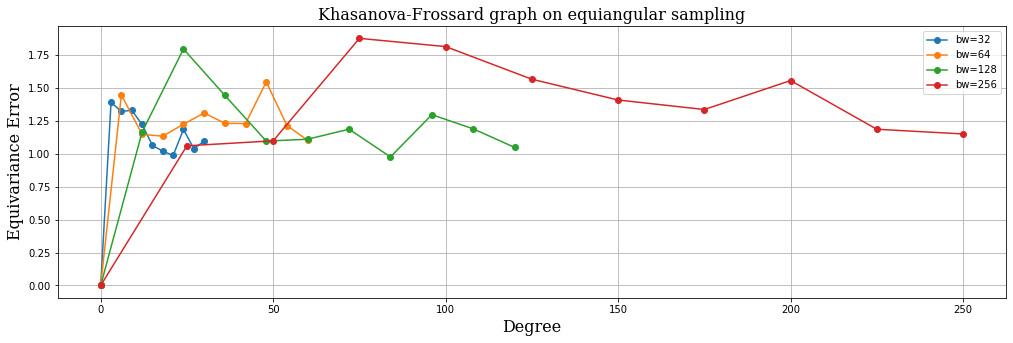

In [30]:
def _equivariance_error(clm, max_iter, _filter, plot, save):
    """Calculates the equivariance error on one signal  only
    as average of max_iter random rotations"""
    
    angles = np.random.uniform(low=0, high=360, size=(max_iter, 3))
    grid = clm.expand(grid='DH')
    F_grid = _filter(grid)
    F_clm = F_grid.expand()

    norm = np.zeros(max_iter)
    for i, [alpha, beta, gamma] in enumerate(angles):
        
        RF_clm = F_clm.rotate(alpha, beta, gamma, degrees=True)
#         RF_clm = F_clm.rotate(alpha, 0, 0, degrees=True)
#        RF_clm = F_clm.rotate(0, 0, gamma, degrees=True)
#         RF_clm = F_clm.rotate(0, 0, 360/64, degrees=True)
        RF_data = RF_clm.expand(grid='DH').data.flatten()

        clm_rotated = clm.rotate(alpha, beta, gamma, degrees=True)
#         clm_rotated = clm.rotate(alpha, 0, 0, degrees=True)
#         clm_rotated = clm.rotate(0, 0, 360/64, degrees=True)
#        clm_rotated = clm.rotate(0, 0, gamma, degrees=True)
    
        grid_rotated = clm_rotated.expand(grid='DH')
        FR_clm = _filter(grid_rotated)
        FR_grid = FR_clm.expand()
        FR_data = FR_grid.expand(grid='DH').data.flatten()
        
        norm[i] = np.linalg.norm(RF_data-FR_data)
    
    initial_norm = np.linalg.norm(F_clm.expand(grid='DH').data.flatten())
    return np.mean(norm)/(initial_norm+ 1e-3)


def equivariance_error(max_iter, _filter, plot=False, save=False, degree=None):
    """Calculates the equivariance error on max_iter signals
    with the same power spectrum as average of N random rotations each"""
    N = 5
    np.random.seed(seed=1994)
    assert(degree is not None)
    
    if degree is not None:
        assert degree < lmax
        power = np.zeros(lmax)
        power[degree] = 1
    norm = np.zeros(max_iter)
    if degree==0:
        return 0
    for i in range(max_iter):
        clm = pyshtools.SHCoeffs.from_random(power)
        norm[i] = _equivariance_error(clm, N, _filter, plot, save)
            
    return np.mean(norm)

degree_step = {
    4: 1,
    8: 2,
    16: 4,
    32: 3,
    64: 6,
    128: 12,
    256: 25,
    512: 50,
}

bws = [32, 64, 128, 256]


equiv_error = dict()

for bw in bws:
    lmax = bw
    
    sphere = SphereEquiangularFrossard(bw=bw, lap_type='combinatorial')
    KF = sphere.L

    def _filter_KF(grid):
        array = grid.data
        f = array.flatten()
        ### here goes the filtering ###
        f = KF@f
        ### ----------------------- ###
        array = np.resize(f, array.shape)
        return pyshtools.SHGrid.from_array(array)
    
    degrees = np.arange(0, lmax, degree_step[bw])    
    
    equiv_error[bw] = np.zeros(len(degrees))
    for i, degree in enumerate(degrees):
        equiv_error[bw][i] = equivariance_error(20, _filter_KF, plot=False, save=False, degree=degree)
    plt.plot(degrees, equiv_error[bw], 'o-', label='bw={}'.format(bw))
    
plt.xlabel('Degree', fontdict=font)
plt.ylabel('Equivariance Error', fontdict=font)
plt.title('Khasanova-Frossard graph on equiangular sampling', fontdict=font)
plt.grid()
plt.legend()

filename = "khasanova_frossard.pickle"
filehandler = open(filename, 'wb') 
pickle.dump(equiv_error, filehandler)

In [31]:
equiv_error

{32: array([0.        , 1.39093271, 1.32124912, 1.33056095, 1.22291309,
        1.06368818, 1.01960122, 0.98751059, 1.18511234, 1.03815991,
        1.09614128]),
 64: array([0.        , 1.4464927 , 1.14742179, 1.13373809, 1.22471976,
        1.30976287, 1.23132029, 1.22984045, 1.5457928 , 1.21463665,
        1.10148886]),
 128: array([0.        , 1.16457551, 1.79596966, 1.44313193, 1.09633895,
        1.11049812, 1.18681617, 0.9760062 , 1.29667408, 1.18933   ,
        1.04835851]),
 256: array([0.        , 1.06059717, 1.09829806, 1.87658133, 1.81403837,
        1.56615623, 1.4084036 , 1.3361257 , 1.55606366, 1.18618375,
        1.15065757])}

In [32]:
filename = "khasanova_frossard.pickle"
filehandler = open(filename, 'wb') 
pickle.dump(equiv_error, filehandler)

### 0 rotations

/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


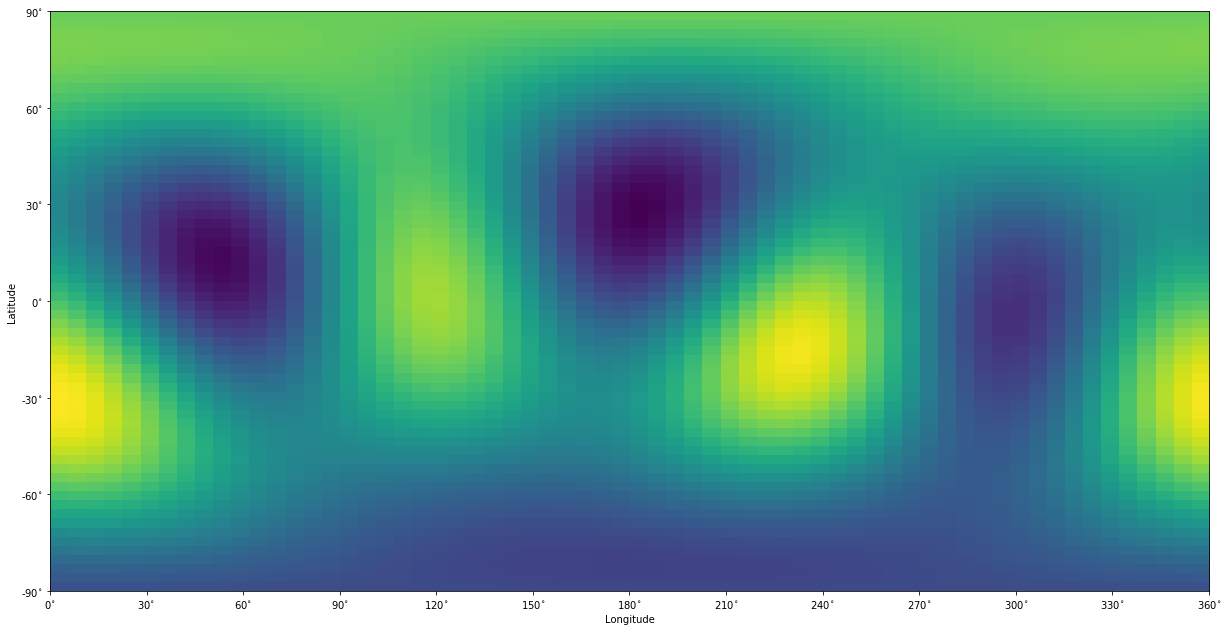

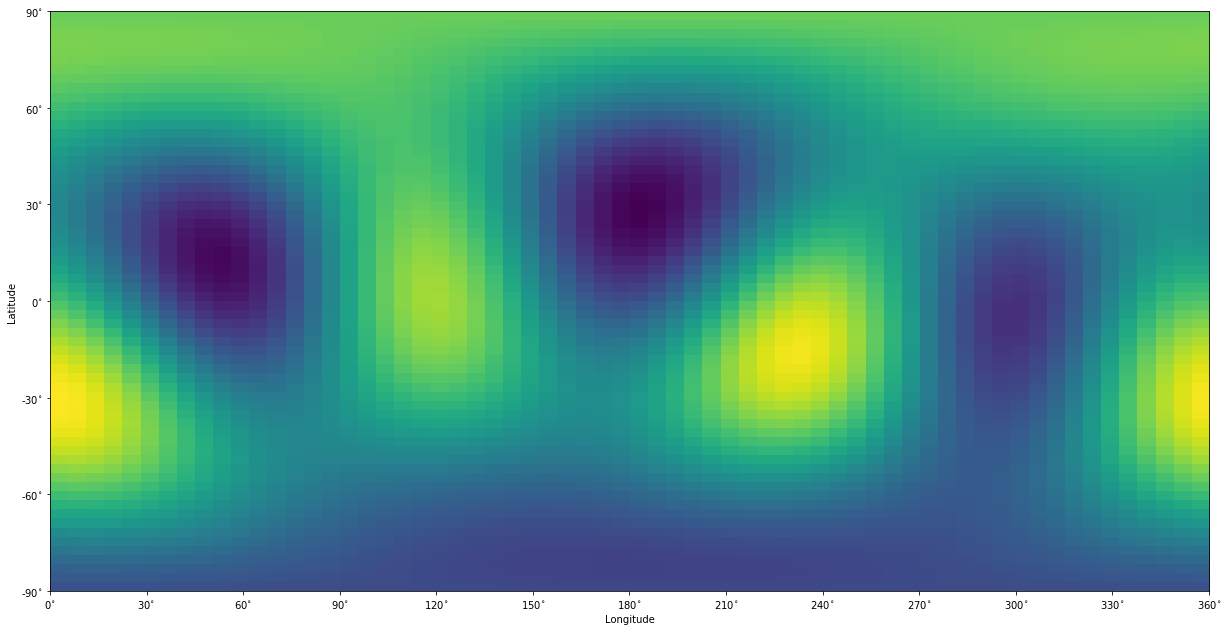

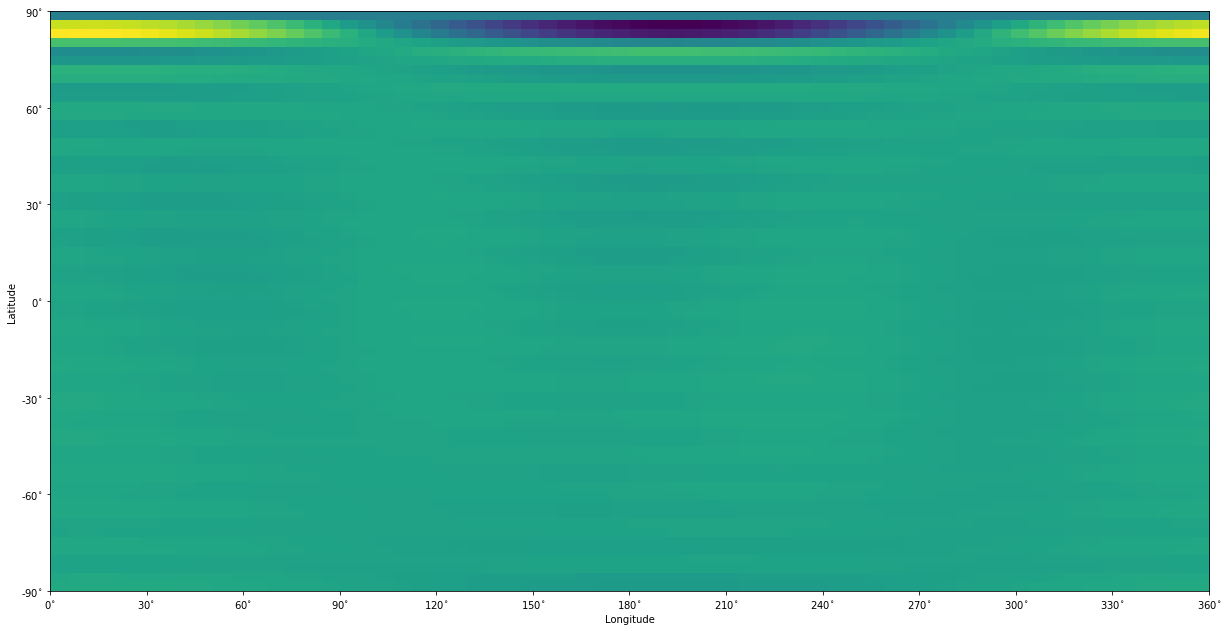

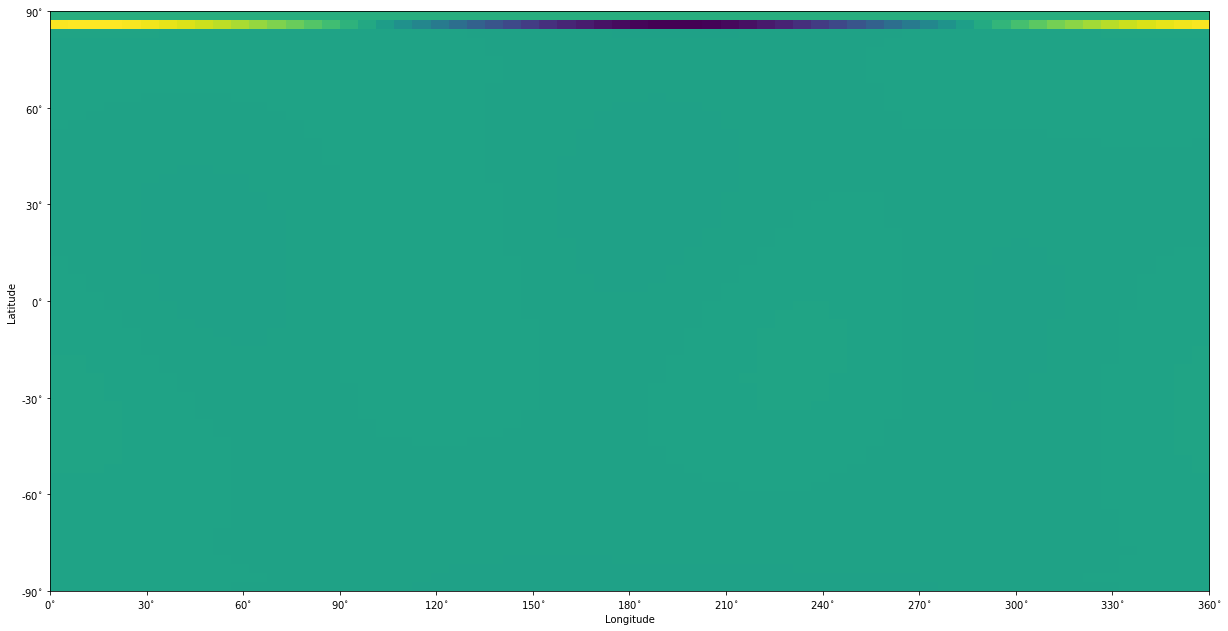

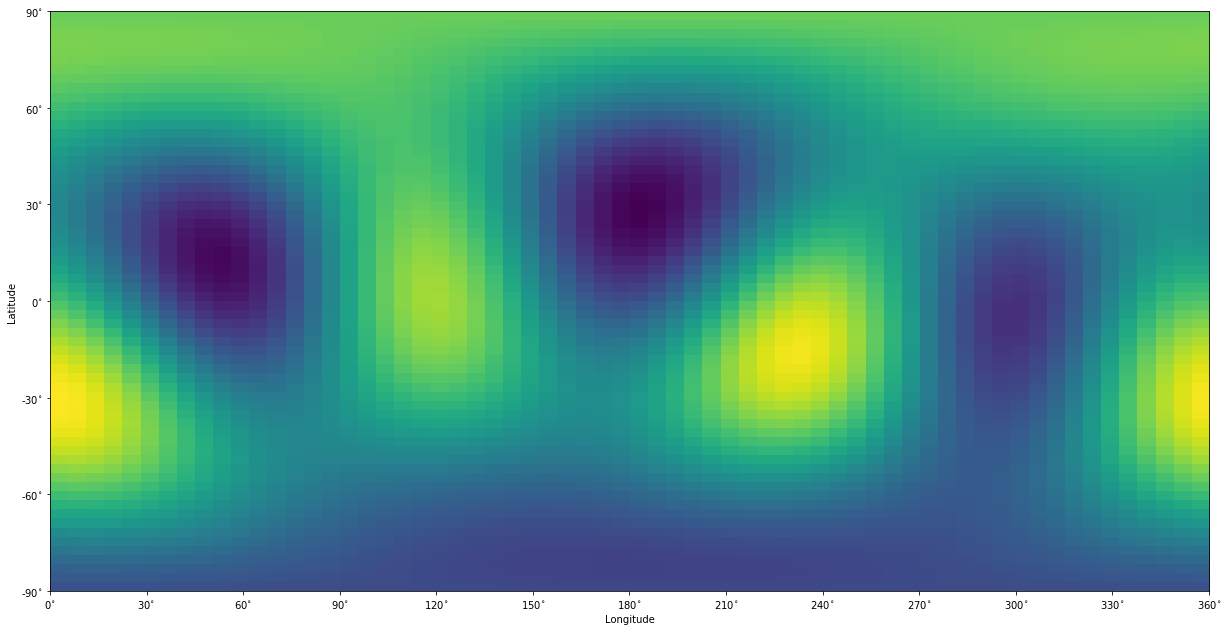

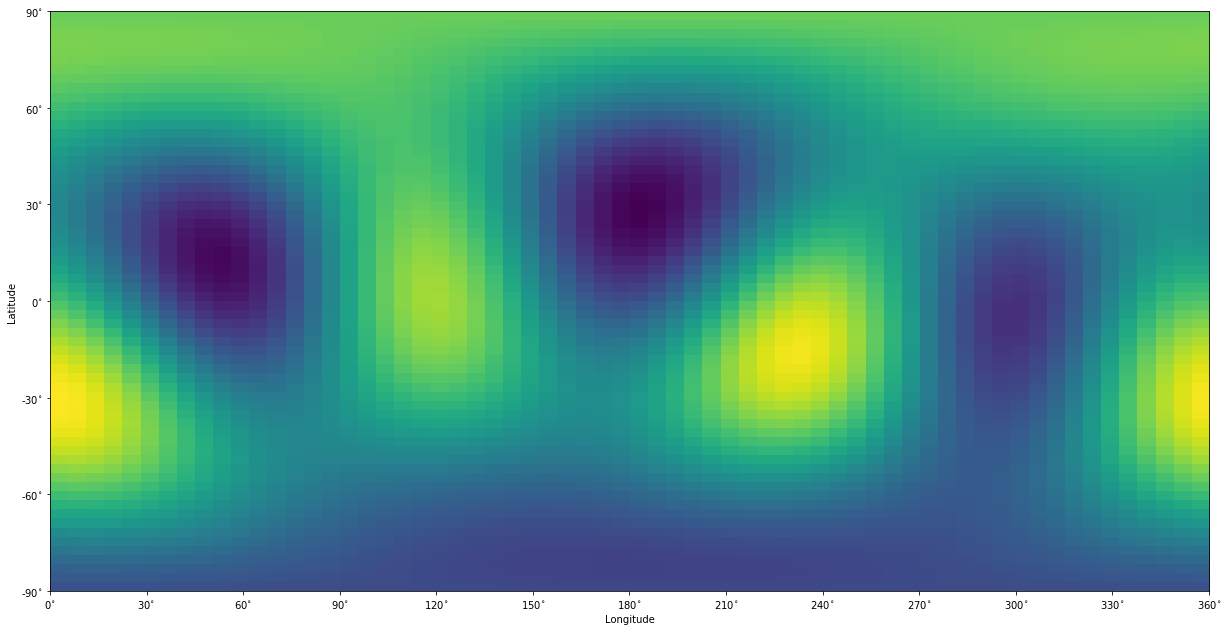

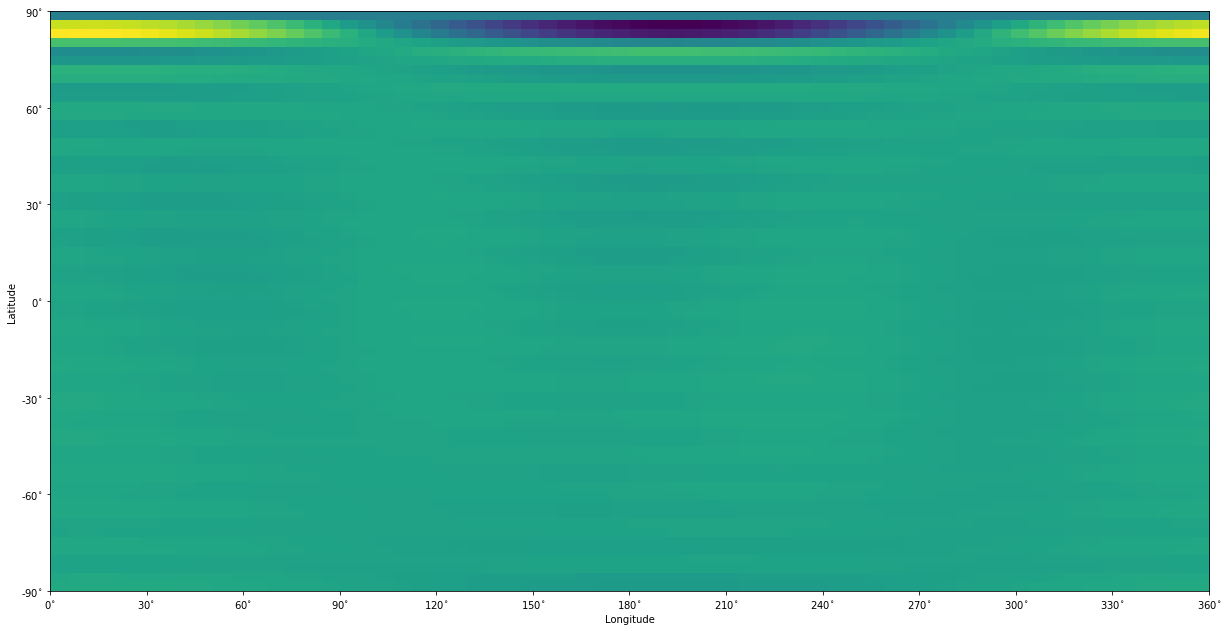

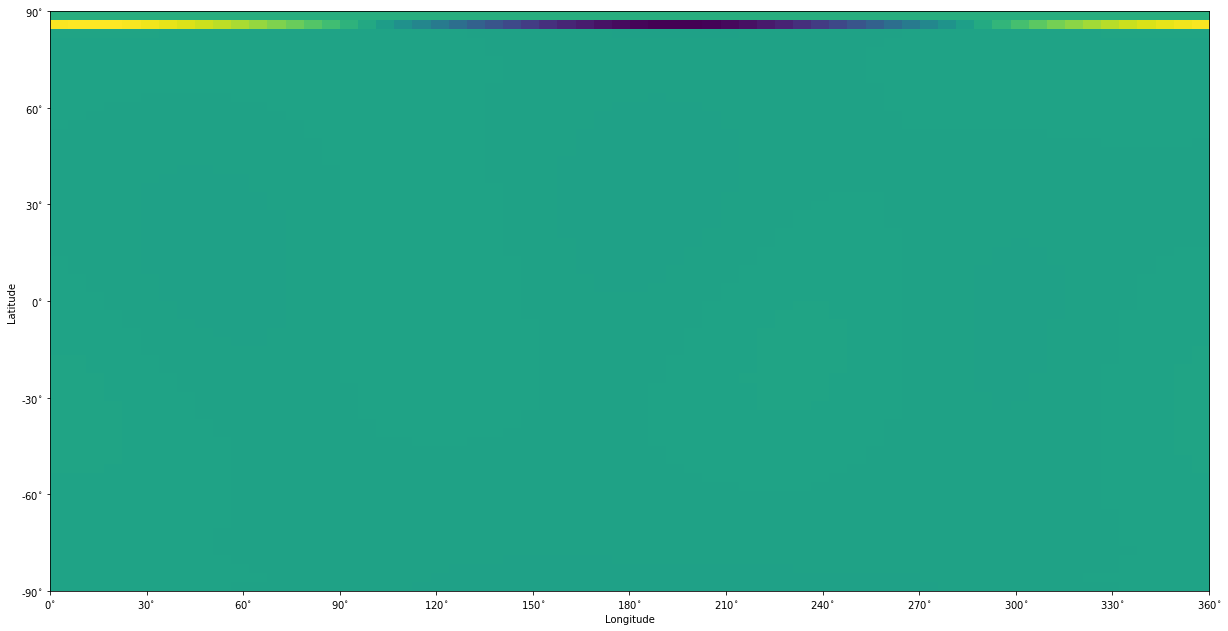

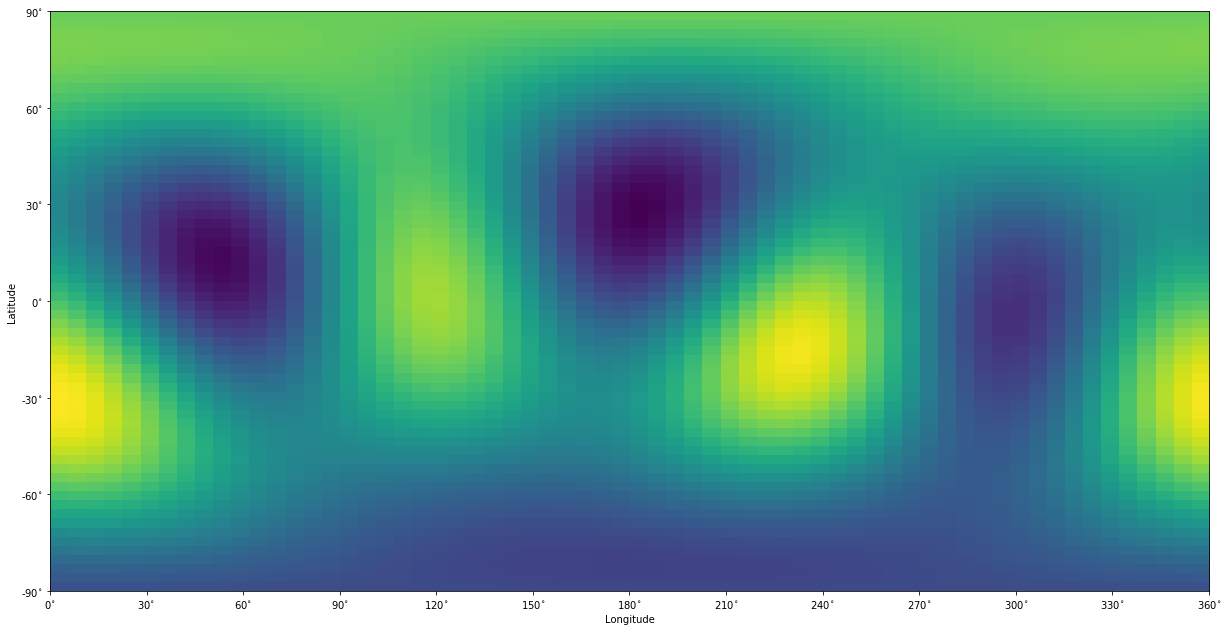

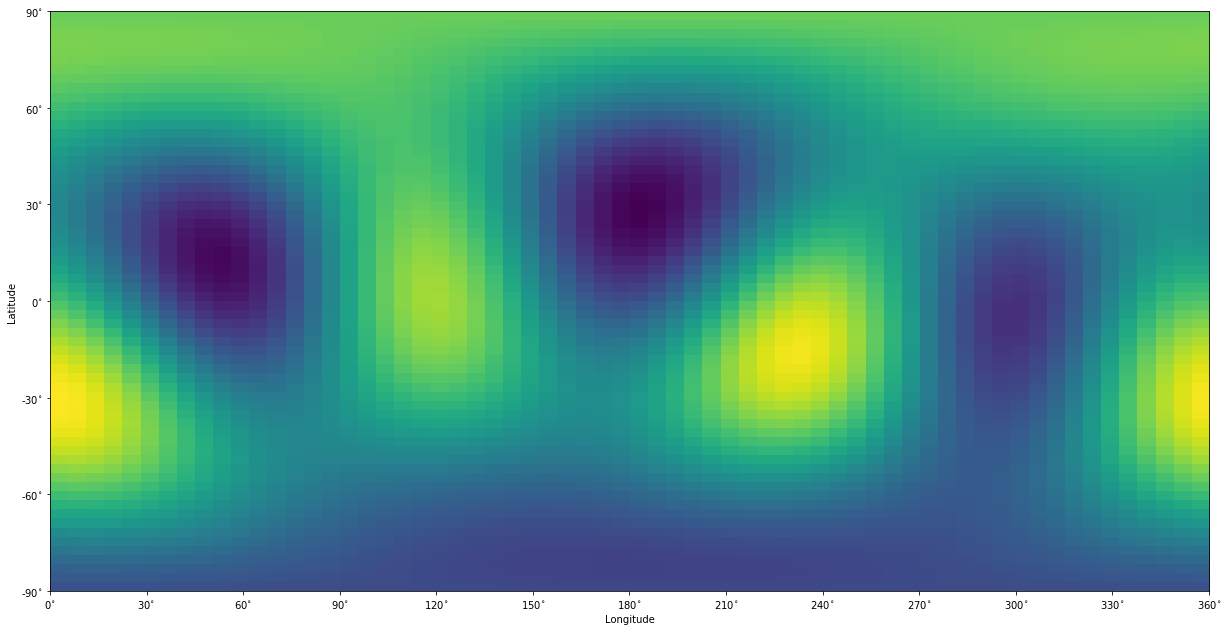

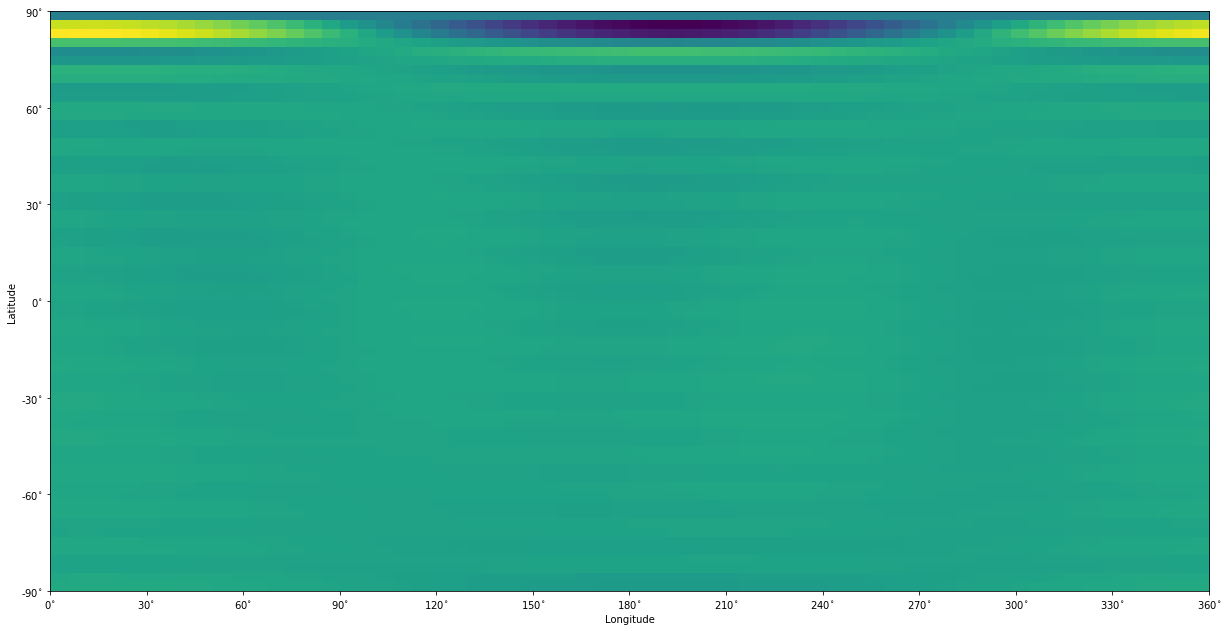

KeyboardInterrupt: 

In [38]:
def _equivariance_error(clm, max_iter, _filter, plot, save, degree):
    """Calculates the equivariance error on one signal  only
    as average of max_iter random rotations"""
    
    grid = clm.expand()
    angles = np.random.uniform(low=0, high=360, size=(max_iter, 3))
    
    norm = np.zeros(max_iter)
    F_grid = _filter(grid)
    F_clm = F_grid.expand()
    for i, [alpha, beta, gamma] in enumerate(angles):
        #clm_rotated = clm.rotate(alpha, beta, gamma, degrees=True)
        clm_rotated = clm.rotate(0, 0, 0, degrees=True)
        grid_rotated = clm_rotated.expand()
        FR_grid = _filter(grid_rotated)
        
        #RF_clm = F_clm.rotate(alpha, beta, gamma, degrees=True)
        RF_clm = F_clm.rotate(0, 0, 0, degrees=True)
        RF_grid = RF_clm.expand()
        
        if degree:
            grid.plot()
            grid_rotated.plot()
            RF_grid.plot()
            FR_grid.plot()
            plt.show()
        norm[i] = np.linalg.norm(RF_grid.data-FR_grid.data)
    
    initial_norm = np.linalg.norm(F_grid.data)
    return np.mean(norm)/initial_norm


def equivariance_error(max_iter, _filter, plot=False, save=False, degree=None):
    """Calculates the equivariance error on max_iter signals
    with the same power spectrum as average of N random rotations each"""
    N = 5
    np.random.seed(seed=1994)
    degrees = np.arange(lmax, dtype=float)
    
    degrees[0] = np.inf
    power = np.ones(lmax) ## to calculate the result in the thesis
    if plot:
        power = degrees**(-3) ## just for plotting
    if degree is not None:
        assert degree < lmax
        power = np.zeros(lmax)
        power[degree] = 1
    norm = np.zeros(max_iter)
    for i in range(max_iter):
        if not i:
            norm[i] = 0.
        else:
            clm = pyshtools.SHCoeffs.from_random(power)
            norm[i] = _equivariance_error(clm, N, _filter, plot, save, degree)
            
    return np.mean(norm)

degree_step = {
    4: 1,
    8: 2,
    16: 4,
    32: 3,
    64: 6,
    128: 12,
    256: 25,
    512: 50,
}

bws = [32, 64, 128]


equiv_error = dict()

for bw in bws:
    lmax = bw
    
    sphere = SphereEquiangularFrossard(bw=bw, lap_type='combinatorial')
    KF = sphere.L

    def _filter_KF(grid):
        array = grid.data
        f = array.flatten()
        ### here goes the filtering ###
        f = KF@f
        ### ----------------------- ###
        array = np.resize(f, array.shape)
        return pyshtools.SHGrid.from_array(array)
    
    degrees = np.arange(0, lmax, degree_step[bw])    
    
    equiv_error[bw] = np.zeros(len(degrees))
    for i, degree in enumerate(degrees):
        equiv_error[bw][i] = equivariance_error(20, _filter_KF, plot=False, save=False, degree=degree)
    plt.plot(degrees, equiv_error[bw], 'o-', label='bw={}'.format(bw))
    
plt.xlabel('Degree', fontdict=font)
plt.ylabel('Equivariance Error', fontdict=font)
plt.title('Khasanova-Frossard graph on equiangular sampling', fontdict=font)
plt.grid()
plt.legend()

filename = "khasanova_frossard.pickle"
filehandler = open(filename, 'wb') 
pickle.dump(equiv_error, filehandler)

# KF: combinatorial vs normalized 

In [28]:
def to_signal(array):
    bw = array.shape[0]//2
    return array.flatten()[2*bw-1:]


def to_array(f):
    N = f.size
    bw = int((2+np.sqrt(4+16*N))//8)
    
    """From a 1-d vector to a 2D grid necessary to initiate a pyshtools.SHGrid object"""
    height, width = 2*bw, 2*bw
    array = np.zeros((height, width))  # shape=(longitude, latitude)
    f = np.append([f[0]]*(2*bw-1), f)  # correct! the first line is the North pole repeated 2bw times
    # now we need to undo the meshgrid
    assert f.size == array.size
    for n, fx in enumerate(f):
        j = n%width
        i = n//width
        array[i, j] = fx
    return array


def _equivariance_error(clm, max_rot, _filter, plot, save):
    """Calculates the equivariance error on one signal  only
    as average of max_iter random rotations"""
    
    grid = clm.expand()
    angles = np.random.uniform(low=0, high=360, size=(max_rot, 3))
    
    norm = np.zeros(max_rot)
    for i, [alpha, beta, gamma] in enumerate(angles):
        clm_rotated = clm.rotate(alpha, beta, gamma, degrees=True)
        grid_rotated = clm_rotated.expand()

        F_grid = _filter(grid)
        F_clm = F_grid.expand()
        RF_clm = F_clm.rotate(alpha, beta, gamma, degrees=True)
        RF_grid = RF_clm.expand()

        FR_grid = _filter(grid_rotated)
        norm[i] = np.linalg.norm(RF_grid.data-FR_grid.data)
    
    initial_norm = np.linalg.norm(F_grid.data)
    return np.mean(norm)/initial_norm


def equivariance_error(max_iter, _filter, plot=False, save=False, degree=None):
    """Calculates the equivariance error on max_iter signals
    with the same power spectrum as average of N random rotations each"""
    max_rot = 5
    np.random.seed(seed=1994)
    degrees = np.arange(lmax, dtype=float)
    
    degrees[0] = np.inf
    power = np.ones(lmax) ## to calculate the result in the thesis
    if plot:
        power = degrees**(-3) ## just for plotting
    if degree is not None:
        assert degree < lmax
        power = np.zeros(lmax)
        power[degree] = 1
    norm = np.zeros(max_iter)
    for i in range(max_iter):
        clm = pyshtools.SHCoeffs.from_random(power)
        norm[i] = _equivariance_error(clm, max_rot, _filter, plot, save)
    return np.mean(norm)

In [56]:
degree_step = {
    4: 1,
    8: 2,
    16: 4,
    32: 3,
    64: 6,
    128: 12,
    256: 25,
    512: 50,
}

bws = [32, 64, 128, 256]


equiv_error = dict()

/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


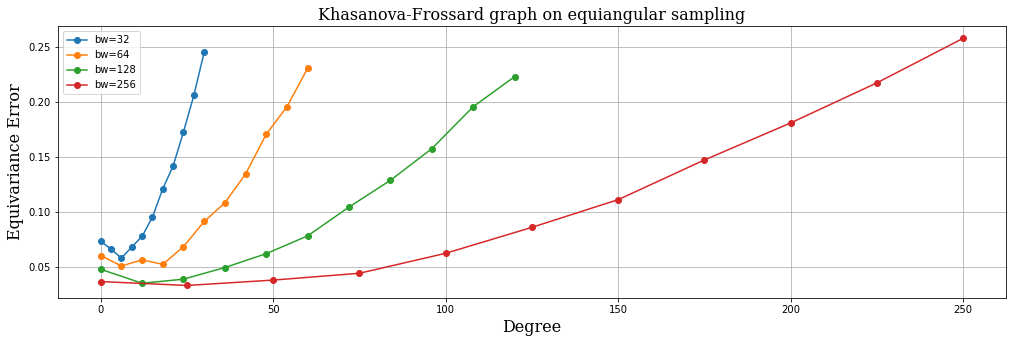

In [57]:
for bw in bws:
    lmax = bw
    
    sphere = SphereEquiangularFrossard(bw=bw, lap_type='normalized')
    KF = sphere.L
    
    #max_eigenval, _ = scipy.sparse.linalg.eigs(KF, k=1)
    #print(np.real(max_eigenval[0]))
    #KF/=np.real(max_eigenval[0])
    def diffuse_KF(x):
        return KF@x


    def _filter_KF(grid):
        array = grid.data
        f = array.flatten()
        ### here goes the filtering ###
        f = diffuse_KF(f)
        ### ----------------------- ###
        array = np.resize(f, array.shape)
        return pyshtools.SHGrid.from_array(array)
    
    
    
    degrees = np.arange(0, lmax, degree_step[bw])
    
    
    
    equiv_error[bw] = np.zeros(len(degrees))
    for i, degree in enumerate(degrees):
        equiv_error[bw][i] = equivariance_error(20, _filter_KF, plot=False, save=False, degree=degree)
    plt.plot(degrees, equiv_error[bw], 'o-', label='bw={}'.format(bw))
    
plt.xlabel('Degree', fontdict=font)
plt.ylabel('Equivariance Error', fontdict=font)
plt.title('Khasanova-Frossard graph on equiangular sampling', fontdict=font)
plt.grid()
plt.legend()


/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


199493.67


/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


2971015.5


/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


45803024.0


/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


719119800.0


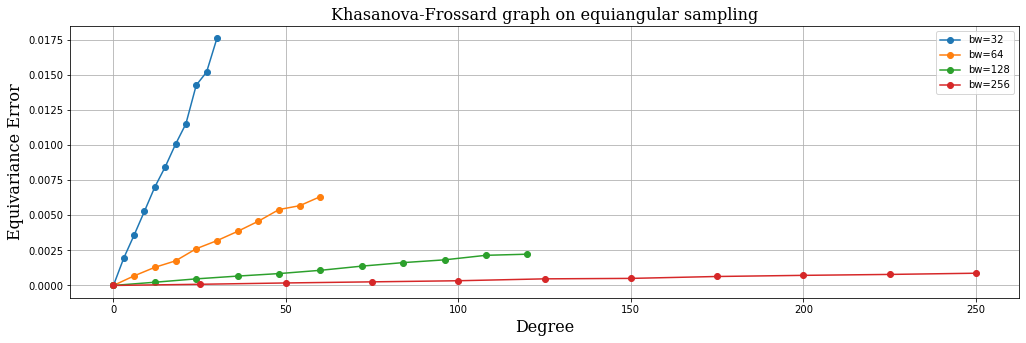

In [58]:
for bw in bws:
    lmax = bw
    
    sphere = SphereEquiangularFrossard(bw=bw, lap_type='combinatorial')
    KF = sphere.L
    
    max_eigenval, _ = scipy.sparse.linalg.eigs(KF, k=1)
    print(np.real(max_eigenval[0]))
    KF/=np.real(max_eigenval[0])
    def diffuse_KF(x):
        return KF@x


    def _filter_KF(grid):
        array = grid.data
        f = array.flatten()
        ### here goes the filtering ###
        f = diffuse_KF(f)
        ### ----------------------- ###
        array = np.resize(f, array.shape)
        return pyshtools.SHGrid.from_array(array)
    
    
    
    degrees = np.arange(0, lmax, degree_step[bw])
    
    
    
    equiv_error[bw] = np.zeros(len(degrees))
    for i, degree in enumerate(degrees):
        equiv_error[bw][i] = equivariance_error(20, _filter_KF, plot=False, save=False, degree=degree)
    plt.plot(degrees, equiv_error[bw], 'o-', label='bw={}'.format(bw))
    
plt.xlabel('Degree', fontdict=font)
plt.ylabel('Equivariance Error', fontdict=font)
plt.title('Khasanova-Frossard graph on equiangular sampling', fontdict=font)
plt.grid()
plt.legend()



/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/martino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


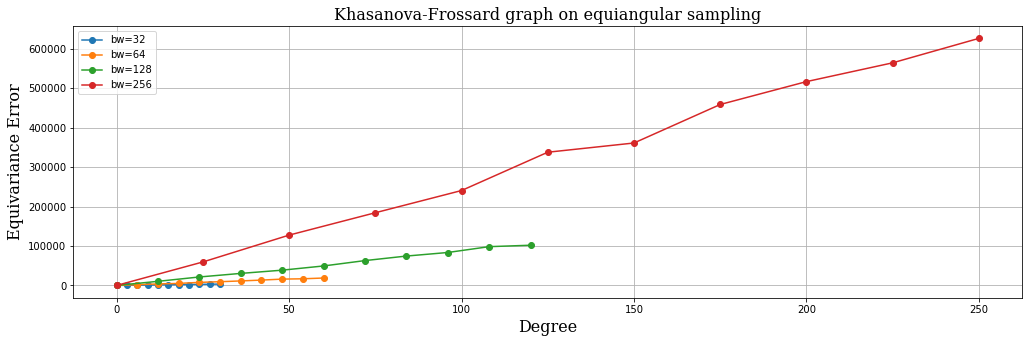

In [59]:
for bw in bws:
    lmax = bw
    
    sphere = SphereEquiangularFrossard(bw=bw, lap_type='combinatorial')
    KF = sphere.L
    
    #max_eigenval, _ = scipy.sparse.linalg.eigs(KF, k=1)
    #print(np.real(max_eigenval[0]))
    #KF/=np.real(max_eigenval[0])
    def diffuse_KF(x):
        return KF@x


    def _filter_KF(grid):
        array = grid.data
        f = array.flatten()
        ### here goes the filtering ###
        f = diffuse_KF(f)
        ### ----------------------- ###
        array = np.resize(f, array.shape)
        return pyshtools.SHGrid.from_array(array)
    
    
    
    degrees = np.arange(0, lmax, degree_step[bw])
    
    
    
    equiv_error[bw] = np.zeros(len(degrees))
    for i, degree in enumerate(degrees):
        equiv_error[bw][i] = equivariance_error(20, _filter_KF, plot=False, save=False, degree=degree)
    plt.plot(degrees, equiv_error[bw], 'o-', label='bw={}'.format(bw))
    
plt.xlabel('Degree', fontdict=font)
plt.ylabel('Equivariance Error', fontdict=font)
plt.title('Khasanova-Frossard graph on equiangular sampling', fontdict=font)
plt.grid()
plt.legend()


